# House value prediction project

### Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.cluster import KMeans,DBSCAN
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import joblib

### Reading the dataset

In [31]:
file_path = "C:\\Users\\ramana777\\Downloads\\housing.csv"
data = pd.read_csv(file_path)

### Dataset Overiew

In [32]:
print("Dataset Overview:\n")
data.info()

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
print("\nFirst Five Rows:")
data.head()


First Five Rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
print("\nBasic Statistics:")
data.describe()


Basic Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Missing Value Analysis

In [35]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

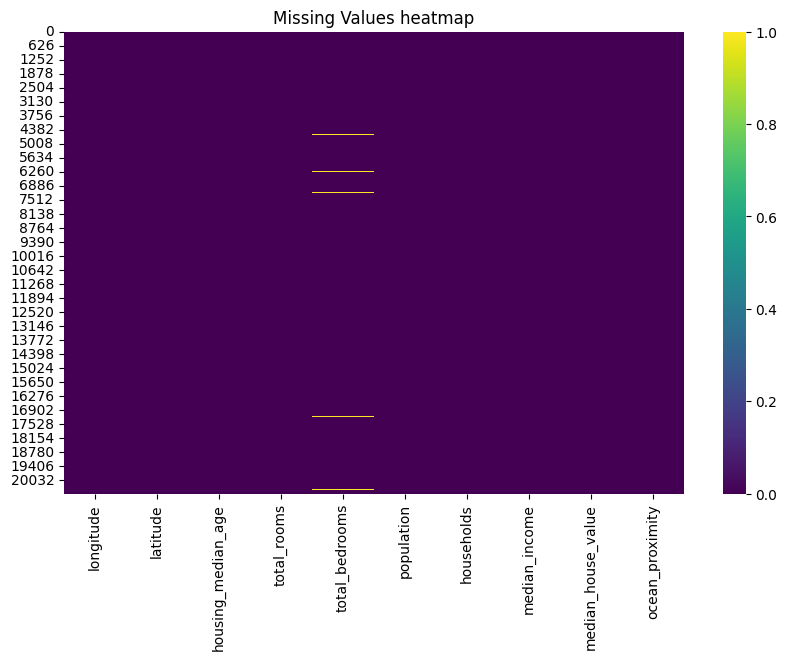

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=True,cmap="viridis")
plt.title("Missing Values heatmap")
plt.show()

### Filling missing values

In [37]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

### Feature Engineering

##### creating new features

In [38]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
data['income_per_person'] = data['median_income'] / (data['population'] + 1)

### Categorical Encoding

In [39]:
encoded_data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

### Training the dataset

In [40]:
X = encoded_data.drop(['median_house_value'], axis=1)
y = encoded_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [41]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Machine learning Models

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
}

In [43]:
results = {}

### Values of predicted values and evaluation metrics

In [44]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "MAE": mae, "R^2": r2}
    print(f"\n{model_name} Performance:")
    print(f"Predicted Value:{y_pred.mean()}")
    print(f"Standard Deviation:{y_pred.std()}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")


Linear Regression Performance:
Predicted Value:205989.85796115792
Standard Deviation:96780.34957877162
Mean Squared Error: 5298238512.503213
Mean Absolute Error: 50966.813148572925
R^2 Score: 0.5956805393980438

Ridge Regression Performance:
Predicted Value:205762.1398932208
Standard Deviation:95172.2721909065
Mean Squared Error: 5297037693.268616
Mean Absolute Error: 51182.401334310525
R^2 Score: 0.5957721763796683

Lasso Regression Performance:
Predicted Value:205988.70398932026
Standard Deviation:96773.3191458677
Mean Squared Error: 5297850344.92487
Mean Absolute Error: 50966.71613363936
R^2 Score: 0.5957101612630331

Decision Tree Performance:
Predicted Value:207947.45179263566
Standard Deviation:116130.426225094
Mean Squared Error: 5170320845.003149
Mean Absolute Error: 44569.082606589145
R^2 Score: 0.6054421992785934

Random Forest Performance:
Predicted Value:206822.62042151164
Standard Deviation:102253.28021676482
Mean Squared Error: 2554226993.292698
Mean Absolute Error: 3253

### Dimensionality Reduction with PCA

In [45]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Explained Variance Ratio of PCA:", pca.explained_variance_ratio_)

Explained Variance Ratio of PCA: [0.40361108 0.23774753 0.15083713 0.09179806 0.06401629]


### Train a model on PCA transformed data

In [46]:
pca_model = RandomForestRegressor(n_estimators=100, random_state=42)
pca_model.fit(X_train_pca, y_train)
pca_pred = pca_model.predict(X_test_pca)
pca_mse = mean_squared_error(y_test, pca_pred)
pca_r2 = r2_score(y_test, pca_pred)
print("\nPCA-based Random Forest Performance:")
print(pca_pred.mean())
print(f"Mean Squared Error: {pca_mse}")
print(f"R^2 Score: {pca_r2}")


PCA-based Random Forest Performance:
205336.96951550388
Mean Squared Error: 3549554327.732931
R^2 Score: 0.729126220388243


### Clustering for insights

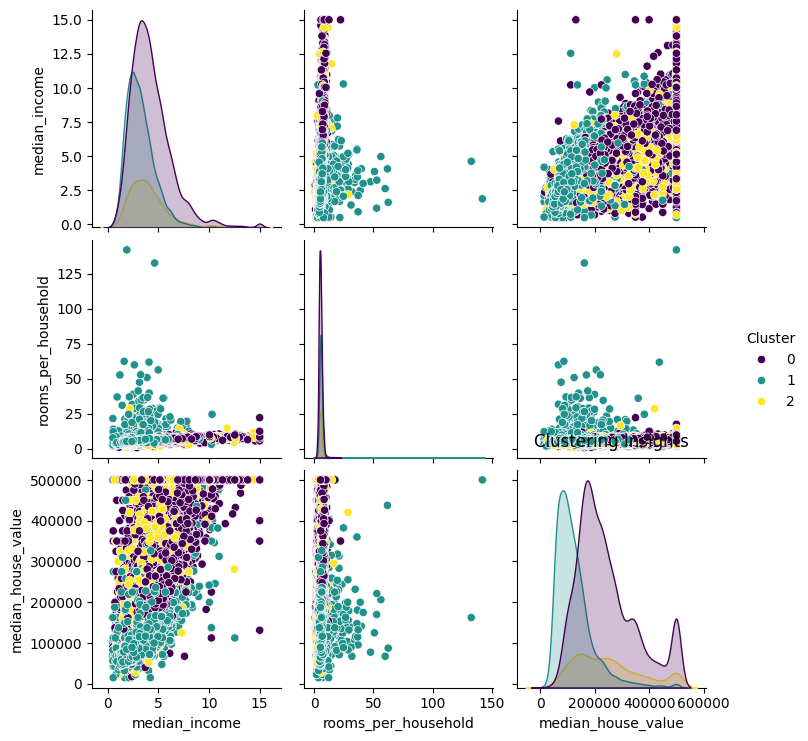

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
data['Cluster'] = kmeans.predict(scaler.transform(X))
sns.pairplot(data, vars=['median_income', 'rooms_per_household', 'median_house_value'], hue='Cluster', palette='viridis')
plt.title("Clustering Insights")
plt.show()

### Visualization of Best model predictions

In [48]:
best_model_name = max(results, key=lambda k: results[k]["R^2"])
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


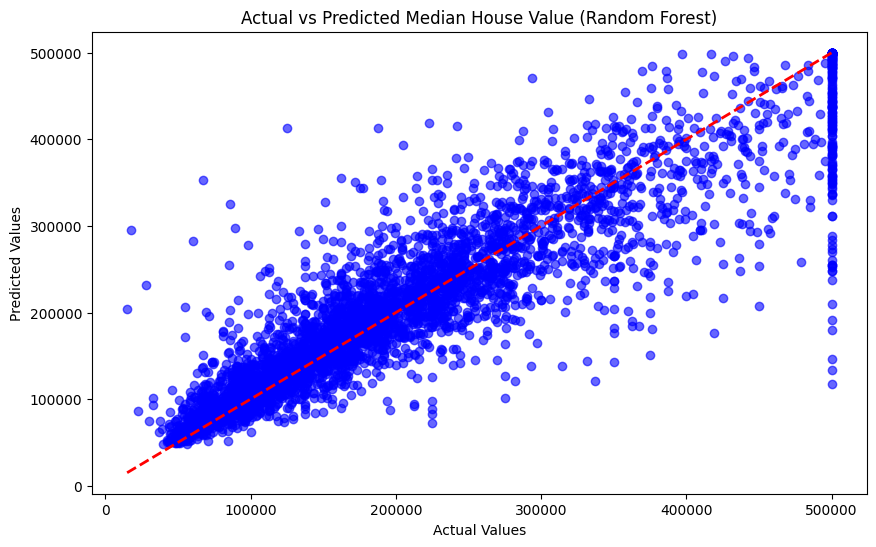

In [49]:
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_best_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title(f"Actual vs Predicted Median House Value ({best_model_name})")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Save results

In [50]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': models["Linear Regression"].coef_
})
coefficients.to_csv("C:\\Users\\ramana777\\Downloads\\linear_regression_coefficients.csv", index=False)

results_df = pd.DataFrame(results).T
results_df.to_csv("C:\\Users\\ramana777\\Downloads\\results.csv", index=True)

### Read the results file

In [51]:
file_path = "C:\\Users\\ramana777\\Downloads\\results.csv"
data = pd.read_csv(file_path)

In [52]:
data

,Unnamed: 0,MSE,MAE,R^2
0,Linear Regression,5.298239e+09,50966.813149,0.595681
1,Ridge Regression,5.297038e+09,51182.401334,0.595772
2,Lasso Regression,5.297850e+09,50966.716134,0.595710
3,Decision Tree,5.170321e+09,44569.082607,0.605442
4,Random Forest,2.554227e+09,32533.862800,0.805082
5,Gradient Boosting,2.877745e+09,36668.791957,0.780393
6,AdaBoost,8.494255e+09,81210.077830,0.351786
